# statistical analysis

## 1. chi-square test

In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy import stats

In [5]:
# load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`Null Hypothesis` : there is no significant association between gender (`sex`) and survival (`survived`) on the titanic. this mean any observed differences in survival rates between genders in the dataset are due to chance and not due to an underlying relationship.

`Alternative Hypothesis` : there is a significant association between gender (`sex`) and survival (`survived`) on the titanic.this implies that the differences in survival rates are not just due to chance but are influenced by the passengers' gender

In [15]:
# create a contigency table
contigency_table = pd.crosstab(df['sex'], df['survived'])
contigency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [18]:
from scipy import stats

# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('chi-square statistic:', chi2)
print('p-value:', p)
print('degrees of freedom:', dof)
print('Expected:\n', expected)


chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
degrees of freedom: 1
Expected:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


As the p_value in this test is `p-value: 1.1973570627755645e-58`  which is far less than 0.05, we reject the null hypothesis.

## 2. Normal Distribution Test

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

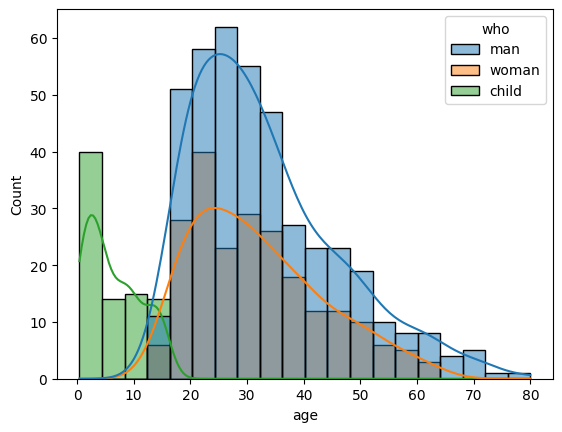

In [22]:
# graphical method

sns.histplot(data=df, x='age', hue='who', kde=True)

# shapiro wilk test on Normal Distribution Gaussian Distribution.
# Null Hypothesis: the data is normally distributed.
# Alternative Hypothesis:

In [34]:
# shapiro wilk test

statistic, p = stats.shapiro(df['age'])

# print results using if else
if p > 0.05:
    print(f'p-value: {p}, sample looks gaussian (fail to reject H0)')
else:
    print(f'p-value: {p}, sample does not looks gaussian/normally distributed (reject H0)')


p-value: nan, sample does not looks gaussian/normally distributed (reject H0)


In [32]:
stats.shapiro(df['fare'])


# print results using if else
if p > 0.05:
    print(f'p-value: {p}, sample looks gaussian (fail to reject H0)')
else:
    print(f'p-value: {p}, sample does not looks gaussian/normally distributed (reject H0)')

p-value: nan, sample does not looks gaussian/normally distributed (reject H0)


<Axes: xlabel='fare', ylabel='Count'>

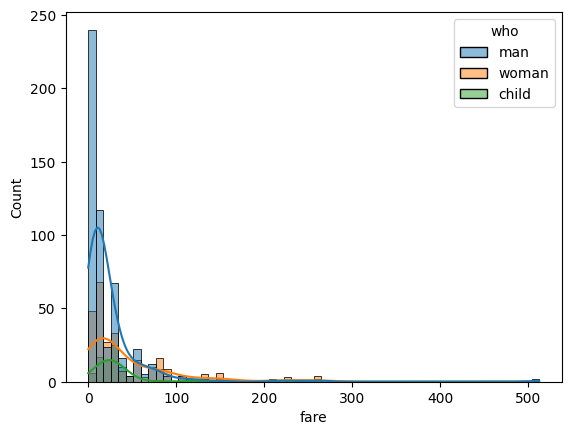

In [33]:

sns.histplot(data=df, x='fare', hue='who', kde=True)

# t-test

## 1. one-sample t-test

In [39]:
import scipy.stats as stats

# sample data
x = [1, 2, 3, 4, 5]

# known population mean 
mu = 4

# perform one sample t-test
t_statistic, p = stats.ttest_1samp(x, mu)

# print the resuls 
print('t-statistic:', t_statistic)
print('p-value:', p)

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, sample mean is equal to population mean(fail to reject H0)')
else:
     print(f'p-value: {p}, sample mean is not equal to population mean(reject H0)')

        

t-statistic: -1.414213562373095
p-value: 0.23019964108049873
p-value: 0.23019964108049873, sample mean is equal to population mean(fail to reject H0)


## 2. two sample t-test (independent)

In [41]:
import scipy.stats as stats

# sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# perform independent two-sample t-test
t_stat, p = stats.ttest_ind(group1, group2)

print('t-statistic:', t_stat)
print('p-value:', p)

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, group1 mean is equal to population mean(fail to reject H0)')
else:
     print(f'p-value: {p}, group2 mean is not equal to population mean(reject H0)')


t-statistic: 1.8482055087756457
p-value: 0.10175647371829195
p-value: 0.10175647371829195, group1 mean is equal to population mean(fail to reject H0)


# 3. paired sample t-test

In [53]:
import scipy.stats as stats
 
# sample data
before = [2, 3, 4, 5, 6]
after  = [3, 4, 5, 6, 7]

# perform paired sample t-test
t_stat, p_val = stats.ttest_rel(before, after)

print('t-statistic:', t_stat)
print('p-value:', p)

# print the results using if else
if p_val > 0.05:
    print(f'p-value: {p_val}, before mean is equal to after mean(fail to reject H0)')
else:
     print(f'p-value: {p_val}, after mean is not equal to after mean(reject H0)')



t-statistic: -inf
p-value: 0.10175647371829195
p-value: 0.0, after mean is not equal to after mean(reject H0)


# test for homogenity 

In [59]:
import scipy.stats as stats

# sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# perform independent two-sample t-test
w_stat, p_val = stats.levene(group1, group2)

print('w-statistic:', w_stat)
print('p-value:', p_val)

# print the results using if else
if p_val > 0.05:
    print(f'p-value: {p_val}, variances are equal (fail to reject H0)')
else:
     print(f'p-value: {p_val}, variances are not equal (reject H0)')


w-statistic: 0.44651162790697696
p-value: 0.5228039334796065
p-value: 0.5228039334796065, variances are equal (fail to reject H0)


# 2. Bartlett's test

In [58]:
import scipy.stats as stats

# sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# perform independent two-sample t-test
w_stat, p_val = stats.levene(group1, group2)

print('w-statistic:', w_stat)
print('p-value:', p_val)

# print the results using if else
if p_val > 0.05:
    print(f'p-value: {p_val}, variances are equal (fail to reject H0)')
else:
     print(f'p-value: {p_val}, variances are not equal (reject H0)')


w-statistic: 0.44651162790697696
p-value: 0.5228039334796065
p-value: 0.5228039334796065, variances are equal (fail to reject H0)


# ANOVA
analysis of variance

# 1. ONE-way ANOVA

In [60]:
import scipy.stats as stats

# sample data
a = [2.3, 3.4, 4.5, 2.3, 3.4]
b = [11.2, 12.2, 13.2, 12.2, 12.3]
c = [22.3, 23.4, 24.5, 22.3, 23.4]

# perform one-way ANOVA
f_stat, p_val = stats.f_oneway(a, b, c)

# print the results base on if else conditions

if p_val > 0.05:
    print(f'p-value: {p_val}, Means are equal (fail to reject H0)')
else:
     print(f'p-value: {p_val}, Means are not equal (reject H0)')




p-value: 4.279979561060641e-13, Means are not equal (reject H0)
